In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for y' = f(y)
def euler_method(y_0,f,N,M,theta):
    y_ns = np.zeros(N+1)
    y_ns[0] = y_0
    h = M/N # timestep length
    # Calculate solutions:
    for i in range(N):
        y_ns[i+1] = y_ns[i] + h * f(y_ns[i],theta)
    return y_ns

In [3]:
# for y' = f(y)
def rk4_method(y_0,f,N,M):
    sols = np.zeros(N+1)
    sols[0] = y_0
    h = M/N # timestep length

    # Calculate solutions
    for i in range(N):
        k1 = h * f(sols[i])
        k2 = h * f(sols[i] + ((1/2) * k1))
        k3 = h * f(sols[i] + ((1/2) * k2))
        k4 = h * f(sols[i] + (1 * k3))
        sols[i+1] = sols[i] + (1/6) * (k1 + (2 * k2) + (2 * k3) + k4)

    return sols

In [4]:
def get_true_sol(y_0,y,N,M):
    true_sols = np.zeros(N+1)
    h = M/N
    t = 0
    for i in range(N+1):
        true_sols[i] = y_0 * y(t)
        t += h
    return true_sols

In [5]:
# c is parameter, data = [(t_i, y_i)] are vectors/arrays of data
def get_error(c,data):
    error = 0
    for i in range(len(data)):
        print(i)
        print((np.exp(c*data[i][0]) - data[i][1]) ** 2)
        error += (np.exp(c*data[i][0]) - data[i][1]) ** 2
    return error

In [6]:
# Only works if y' = f(y) = cy is current ODE
def get_error_prime(c,data):
    error = 0
    for i in range(len(data)):
        error += 2 * data[i][0] * np.exp(c * data[i][0]) * (np.exp(c * data[i][0]) - data[i][1])
    return error

In [7]:
# c_init == guess, N == # iterations, alpha == learning step, data == data
def gradient_descent(c_init, N, alpha, data):
    c_i = c_init
    for i in range(N):
        c_i = c_i - (alpha * get_error_prime(c_i, data))
    return c_i

In [8]:
def run_grad_desc_stuff():
    t_0 = 1/2
    t_1 = 1.
    c_gen = -1
    c_true = -1
    c_guess = -.5
    data = [(t_0,np.exp(c_gen * t_0)), (t_1,np.exp(c_gen * t_1))]
    print(data)
    c_gd = gradient_descent(c_guess, 100000, .01, data)
    print("c_gd",c_gd)
    error = get_error(c_true,data)
    print('error',error)
    error_prime = get_error_prime(c_true, data)
    print('error prime', error_prime)

In [23]:
def run_time_integrator_stuff():
    # Set up DE to solve:
    # y' = f(y), f(y) = cy
    c = 3
    f_0 = lambda y: c*y
    y_true = lambda t: np.exp(c*t)
    
    # Set up solver parameters
    y_0 = 1 # y(0) = 1 (initial condition)
    f = f_0 # assign
    N = 100 # N timesteps
    M = 1 # set solution time interval as [0,M]
    h = M/N # timestep length
    
    # Collect solution data
    times = np.arange(0,M+h,h)
    euler_sols = euler_method(y_0,f,N,M)
    rk4_sols = rk4_method(y_0,f,N,M)
    true_sols = get_true_sol(y_0,y_true,N,M)
    
    # Create DataFrame to store different solutions
    sols_dict = {"true_sols":true_sols, "euler_sols":euler_sols} # add , "rk4_sols":rk4_sols for rk4
    sols_df = pd.DataFrame(data = sols_dict, index=times)
    display(sols_df)
    
    # Display data in graph format
    ax = sns.lineplot(data=sols_df)
    ax.set(xlabel='t', ylabel='y(t)')
    plt.show()

,true_sols,euler_sols
0.00,1.000000,1.000000
0.01,1.030455,1.030000
0.02,1.061837,1.060900
0.03,1.094174,1.092727
0.04,1.127497,1.125509
...,...,...
0.96,17.814273,17.075506
0.97,18.356799,17.587771
0.98,18.915846,18.115404
0.99,19.491920,18.658866


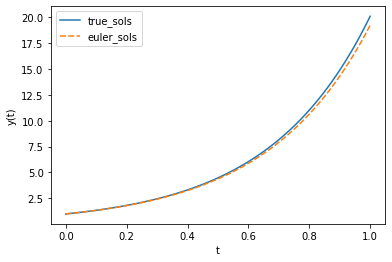

In [24]:
run_time_integrator_stuff()